# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Ibrahim Olayiwola

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Import histogram and bar charts
import plots as pts

# Black code formatter (Optional)
%load_ext lab_black
%matplotlib inline

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


#### Exploratory Data Analysis

In [2]:
# A function used to load a dataset.
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

In [3]:
# Load the dataset using the load_data function
ulta_data = load_data(filename="Ulta Skincare Reviews.csv")

# View the first 3 rows of the dataset
ulta_data.head(3)

Shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


- From the above data, we can see that there are  4150 rows and 10 columns in the dataset.

- The Review_Date column is not necessarily a date, it is the time that has passed before the scrape date.



In [4]:
# View basic information about the dataset
ulta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4147 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [5]:
# Check duplicates in the dataset
ulta_data.duplicated().sum()

456

- There are 7 strings datatypes and 2 integers.

- The Scrape_Date has the wrong datatype.

- There are 456 duplicates in the dataset, they will be removed.

##### Review_Title

_The title of the review._

In [6]:
# Review_Title
ulta_data["Review_Title"].describe()

count                4150
unique               2828
top       Amazing product
freq                   95
Name: Review_Title, dtype: object

In [7]:
ulta_data["Review_Title"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4150 entries, 0 to 4149
Series name: Review_Title
Non-Null Count  Dtype 
--------------  ----- 
4150 non-null   object
dtypes: object(1)
memory usage: 32.5+ KB


- There are 2828 unique titles in the review titles.
- There are no missing data in the column.

As there are many unique titles, no plot will be made for this column.

##### Review_Text

_The full text of the review._

In [8]:
# Description of the column
ulta_data["Review_Text"].describe()

count                                                                                                                                                                                                                                                                                                                                4147
unique                                                                                                                                                                                                                                                                                                                               3660
top       I just used my fingers and rubbed mask on clean damp skin. Left on for 5 mins and then wet fingers and rubbed it into my skin and then rinsed off. My skin was left feeling so soft and smooth and looking great. The texture of the mask has little spheres and it smells great. I would definitely recommend giving it a try!
freq      

What are the odds that 89 different people will write the same review? Are they bots? I don't know.

##### Verified_Buyer

_Whether the reviewer is a verified buyer of the product._

In [9]:
# Basic information about the column
ulta_data["Verified_Buyer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4150 entries, 0 to 4149
Series name: Verified_Buyer
Non-Null Count  Dtype 
--------------  ----- 
4150 non-null   object
dtypes: object(1)
memory usage: 32.5+ KB


- There are no empty cells in the column

- The datatype is string

In [10]:
# Unique values in the column
ulta_data["Verified_Buyer"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
# Number of the buyers
ulta_data["Verified_Buyer"].value_counts()

Verified_Buyer
No     2901
Yes    1249
Name: count, dtype: int64

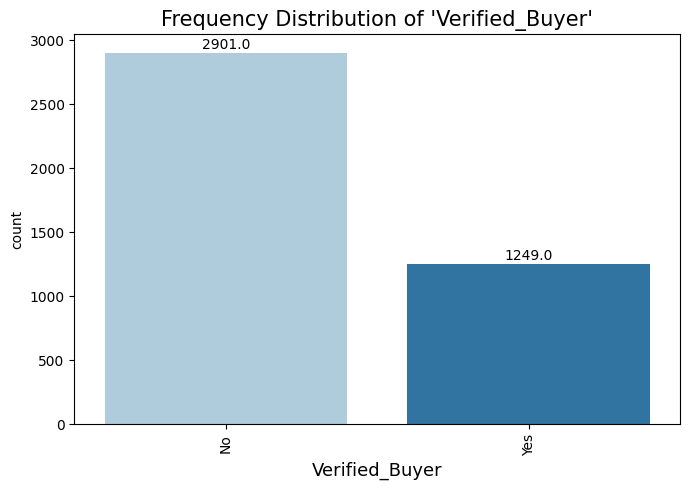

In [12]:
# A bar chart showing the verified buyers frequency
pts.display_count(data=ulta_data, feature="Verified_Buyer")

- The number of non-verified buyers are more than twice the verified buyers.

##### Review_Date

_The date the review was published relative to the review scrape date._

In [13]:
# Basic information about the column
ulta_data["Review_Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4150 entries, 0 to 4149
Series name: Review_Date
Non-Null Count  Dtype 
--------------  ----- 
4150 non-null   object
dtypes: object(1)
memory usage: 32.5+ KB


In [14]:
# Description of the column
ulta_data["Review_Date"].describe()

count            4150
unique             41
top       2 years ago
freq              916
Name: Review_Date, dtype: object

In [15]:
# Getting the unique values
ulta_data["Review_Date"].unique()

array(['15 days ago', '27 days ago', '2 months ago', '3 months ago',
       '4 months ago', '5 months ago', '6 months ago', '7 months ago',
       '8 months ago', '9 months ago', '10 months ago', '11 months ago',
       '1 year ago', '2 years ago', '3 years ago', '4 years ago',
       '5 years ago', '6 years ago', '7 years ago', '8 years ago',
       '9 years ago', '10 years ago', '11 years ago', '1 month ago',
       '7 days ago', '16 days ago', '17 days ago', '18 days ago',
       '19 days ago', '20 days ago', '22 days ago', '23 days ago',
       '25 days ago', '28 days ago', '29 days ago', '4 days ago',
       '5 days ago', '12 days ago', '14 days ago', '21 days ago',
       '24 days ago'], dtype=object)

From the above cells,
- Some reviews go back 11 years before the data were scraped.
- There are 41 unique values

There might be a way to group the data in this column or it might not be needed.

##### Review_Location

_The location of the reviewer._

In [16]:
# Basic information about the dataset
ulta_data["Review_Location"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4150 entries, 0 to 4149
Series name: Review_Location
Non-Null Count  Dtype 
--------------  ----- 
4149 non-null   object
dtypes: object(1)
memory usage: 32.5+ KB


In [17]:
# The description of the data
ulta_data["Review_Location"].describe()

count            4149
unique           1423
top       Undisclosed
freq              909
Name: Review_Location, dtype: object

From the above cells, 
- There are two many locations in the column, which is in a business sense as people from different location purchase the products, however the geographical distance of the buyers are not known.


##### Review_Upvotes

_How many times the review was upvoted by other reviewers?_

In [18]:
# Basic statistical description of the column
ulta_data["Review_Upvotes"].describe()

count    4150.000000
mean        0.591325
std         2.210041
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        84.000000
Name: Review_Upvotes, dtype: float64

Most of the reviews did not receive any upvotes as the 75 percentile is zero. Meaning at least 75% of the reviews did not receive a upvote.

In [19]:
# Number of unique values in the column
ulta_data["Review_Upvotes"].nunique()

23

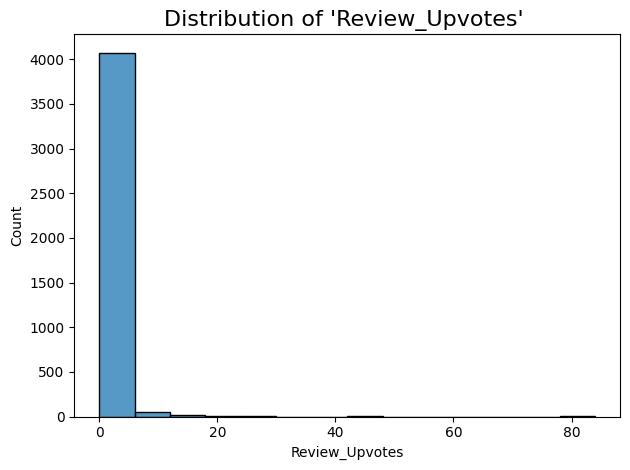

In [20]:
# A distribution of the column
pts.plot_histogram(data=ulta_data, feature="Review_Upvotes")

There are 23 unique values, but not all is visible in the histogram

Let's see the unique values

In [21]:
# Unique values
ulta_data["Review_Upvotes"].unique()

array([ 0,  3,  1,  2, 20,  4,  7,  5,  8, 11,  6,  9, 25, 14, 12, 17, 15,
       13, 10, 16, 19, 47, 84], dtype=int64)

In [22]:
# The value counts of the Reviews upvote
upvotes_count = ulta_data["Review_Upvotes"].value_counts()
upvotes_count

Review_Upvotes
0     3148
1      542
2      219
3       89
4       48
5       29
7       16
6       11
9        9
12       6
8        5
14       5
10       5
11       4
13       4
25       2
15       2
20       1
17       1
16       1
19       1
47       1
84       1
Name: count, dtype: int64

In [23]:
# The proportion of the values
upvotes_count / ulta_data.shape[0]

Review_Upvotes
0     0.758554
1     0.130602
2     0.052771
3     0.021446
4     0.011566
5     0.006988
7     0.003855
6     0.002651
9     0.002169
12    0.001446
8     0.001205
14    0.001205
10    0.001205
11    0.000964
13    0.000964
25    0.000482
15    0.000482
20    0.000241
17    0.000241
16    0.000241
19    0.000241
47    0.000241
84    0.000241
Name: count, dtype: float64

Just 25 percent of the reviews got an upvote.

Let's see the downvotes column

##### Reviews_Downvotes

_How many times the review was downvoted by other reviewers._

In [24]:
# Basic statistical description of the column.
ulta_data["Review_Downvotes"].describe()

count    4150.000000
mean        0.161205
std         0.912561
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Review_Downvotes, dtype: float64

In [25]:
# Number of unique values in the column
ulta_data["Review_Downvotes"].nunique()

15

There are 15 unique values in the dataset.

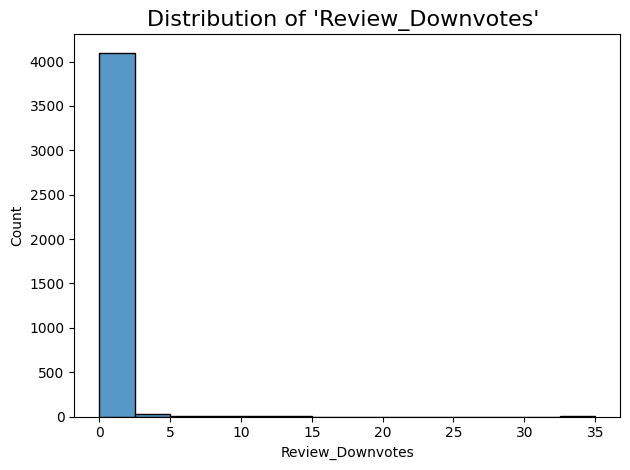

In [26]:
# The distribution of the column
pts.plot_histogram(data=ulta_data, feature="Review_Downvotes")

In [27]:
downvotes_count = ulta_data["Review_Downvotes"].value_counts()
downvotes_count

Review_Downvotes
0     3785
1      262
2       54
3       19
4        7
7        6
9        6
5        3
6        2
11       1
8        1
13       1
14       1
35       1
10       1
Name: count, dtype: int64

In [28]:
downvotes_count / ulta_data.shape[0]

Review_Downvotes
0     0.912048
1     0.063133
2     0.013012
3     0.004578
4     0.001687
7     0.001446
9     0.001446
5     0.000723
6     0.000482
11    0.000241
8     0.000241
13    0.000241
14    0.000241
35    0.000241
10    0.000241
Name: count, dtype: float64

Wow, over 90 percent of the reviews did not receive a downvotes which might be good if we know if the review are good reviews.

##### Product

_The name of the product the review was issued for._

In [29]:
# Some basic description of the column
ulta_data["Product"].describe()

count                   4150
unique                     4
top       Daily Superfoliant
freq                    1500
Name: Product, dtype: object

There are only 4 product in the column

In [30]:
# Unique values of the column
ulta_data["Product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [31]:
# The frequency of the values in the column
ulta_data["Product"].value_counts()

Product
Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: count, dtype: int64

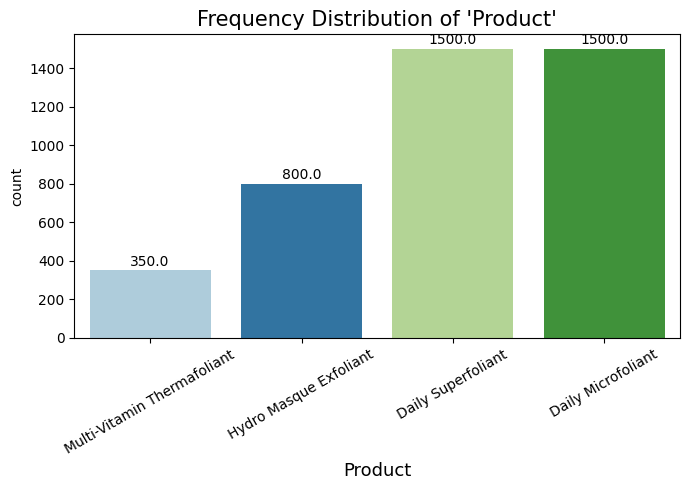

In [32]:
# A bar chart showing the frequency of the different products
pts.display_count(data=ulta_data, feature="Product", rotation=30)

- The product with the least reviews is the Multi-vitamin Thermafoliant.
- 800 reviews was for Hydro Masque Exfoliant
- Daily Superfoliant and Daily Microfoliant has both 1500 reviews.

##### Brand
_The brand of the product._

In [33]:
# Unique values in the column
ulta_data["Brand"].unique()

array(['Dermalogica'], dtype=object)

There is only one brand in the dataset.

##### Scrape Date
_The date the data was pulled from the web._

In [34]:
# Number of unique values in the column
ulta_data["Scrape_Date"].nunique()

1

In [35]:
# The value in the column
ulta_data["Scrape_Date"].unique()

array(['3/27/23'], dtype=object)

The date the data was scraped was on th 27th of March 2023.

From the above cells, somethings jumped out.

- Most comments did not get any upvotes or downvotes, the percentage of ones that got is negligible.
- The reviews go back a number of years.
- Most users are not verified buyers.
- The daily-use products Microfoliant and Superfoliant have most reviews

##### Main Focus

For this project, the focus is on two columns, maybe 3
- The `Review_Text` column
- The `Product` column.

The `Review_Title` column might be used to tell us more about the products.

Copying out the focus columns

In [36]:
review_focus = ulta_data[["Review_Title", "Review_Text", "Product"]].copy()

review_focus.head(3)

,Review_Title,Review_Text,Product
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,Multi-Vitamin Thermafoliant


In [38]:
# Convert column names to lower case
review_focus.columns = review_focus.columns.str.lower()

# Check
review_focus.columns

Index(['review_title', 'review_text', 'product'], dtype='object')

In [39]:
# Some stats about the data
review_focus["review_title"].describe()

count                4150
unique               2828
top       Amazing product
freq                   95
Name: review_title, dtype: object

In [40]:
# number of duplicates in the data
review_focus.duplicated().sum()

464

In [42]:
# Drop duplicates
review_focus = review_focus.drop_duplicates(keep=False)

# Check
review_focus.duplicated().sum()

0

In [43]:
# Number of empty cells in the data
review_focus.isna().sum()

review_title    0
review_text     3
product         0
dtype: int64

In [44]:
# Remove empty rows
review_focus.dropna(inplace=True)

# Check
review_focus.isna().sum()

review_title    0
review_text     0
product         0
dtype: int64

In [45]:
# Check the unique products
review_focus["product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

There are four unique products in the dataset.




Query the data to get the top and bottom review titles for each products

In [46]:
# Top 5 review titles for the Multi-Vitamin Thermafoliant product
top_5_multi_vitamin = (
    review_focus.query("product=='Multi-Vitamin Thermafoliant'")["review_title"]
    .value_counts()[:5]
    .sort_values(ascending=False)
)

top_5_multi_vitamin

review_title
Great product     6
Love this         4
Great product!    4
Love it           4
Amazing           4
Name: count, dtype: int64

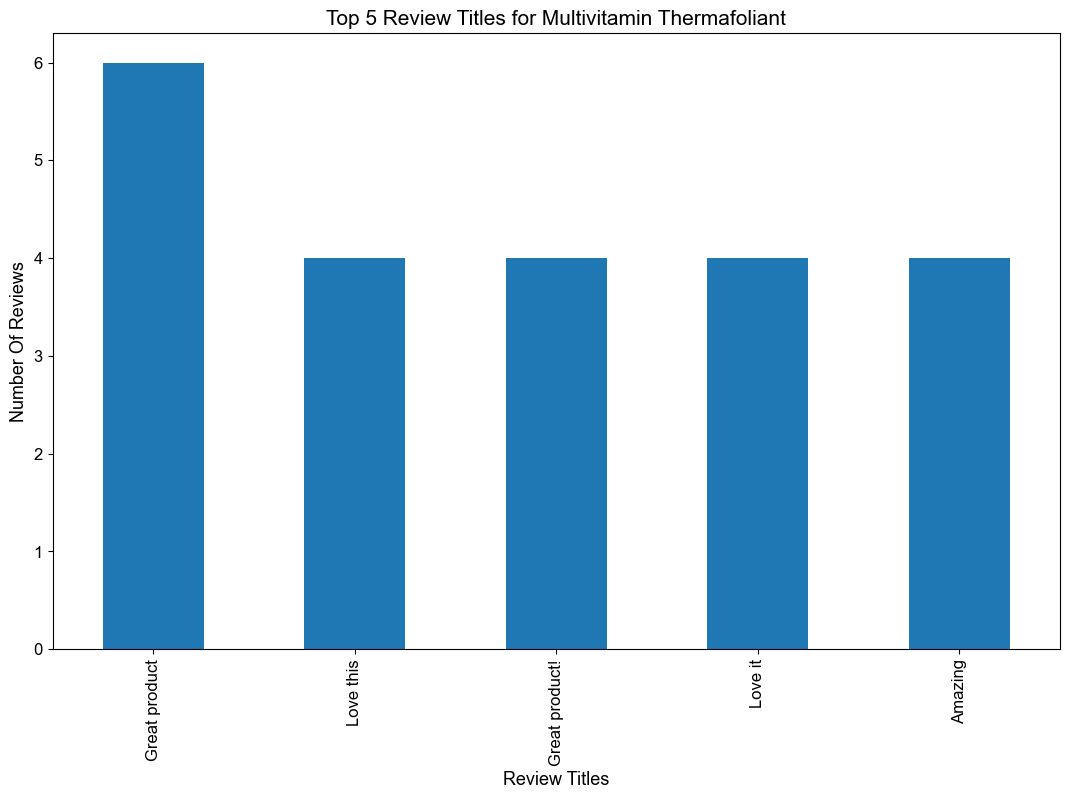

In [47]:
# Bar plot for the top 5 review titles for Multiviatamin Thermofoliant
top_5_multi_vitamin.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Top 5 Review Titles for Multivitamin Thermafoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

In [48]:
# Bottom 5 review titles for the Multi-Vitamin Thermafoliant product.
bottom_5_multi_vitamin = (
    review_focus.query("product=='Multi-Vitamin Thermafoliant'")["review_title"]
    .value_counts()[-5:]
    .sort_values(ascending=False)
)

bottom_5_multi_vitamin

review_title
After the first time use,              1
Smells great                           1
Great for my hyper-pigmentation and    1
The form is just right                 1
Excellent Product                      1
Name: count, dtype: int64

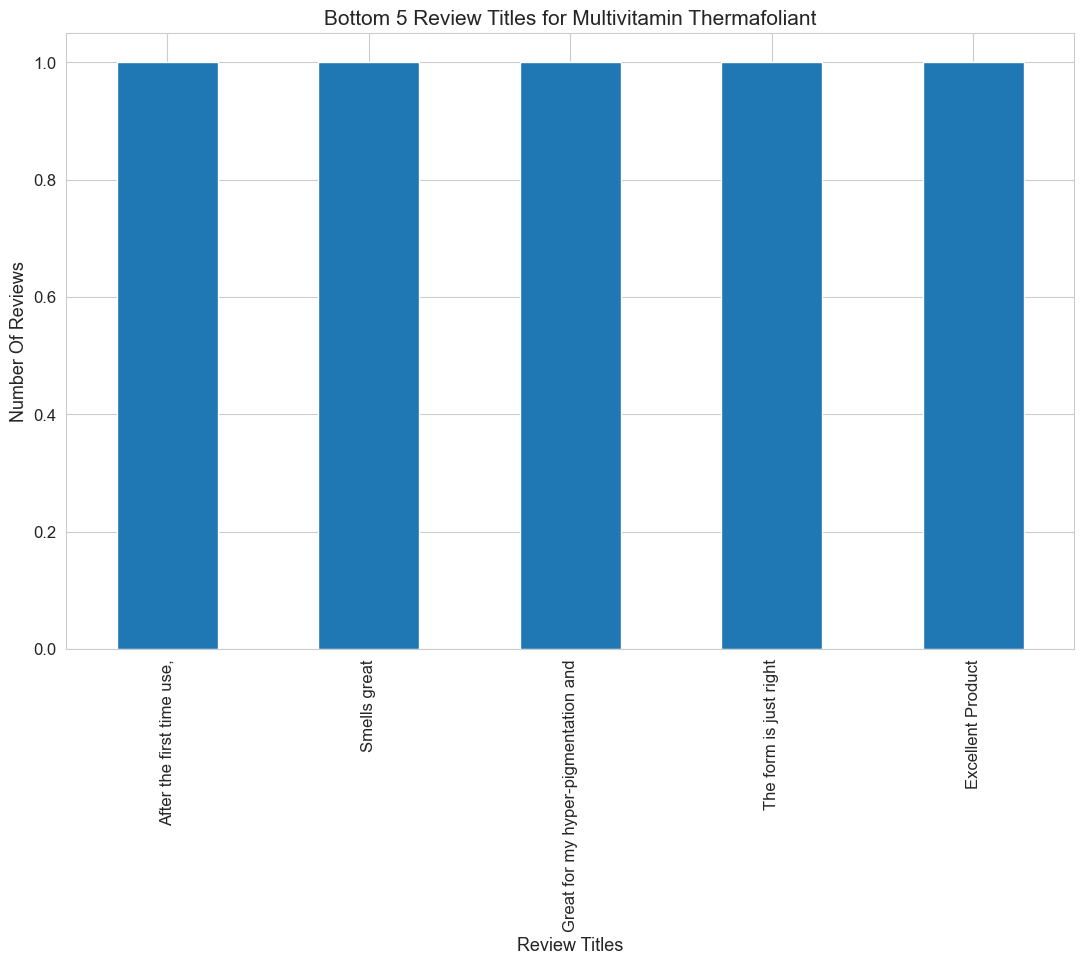

In [49]:
# Bar plot for the bottom 5 review titles for Multiviatamin Thermofoliant
bottom_5_multi_vitamin.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Bottom 5 Review Titles for Multivitamin Thermafoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

> From the above cells of the top 5 and bottom 5 titles and plots for the Multi-vitamin Thermofoliant products, all the titles are positive. This can mean that the overall reviews of the reviews are positive for the products.

In [50]:
# Top 5 review titles for the Hydro masqur Exofoliant product
top_5_hydro_masque = (
    review_focus.query("product=='Hydro Masque Exfoliant'")["review_title"]
    .value_counts()[:5]
    .sort_values(ascending=False)
)

top_5_hydro_masque

review_title
Amazing          6
Great product    4
Nice             4
Love it          4
Amazing!         3
Name: count, dtype: int64

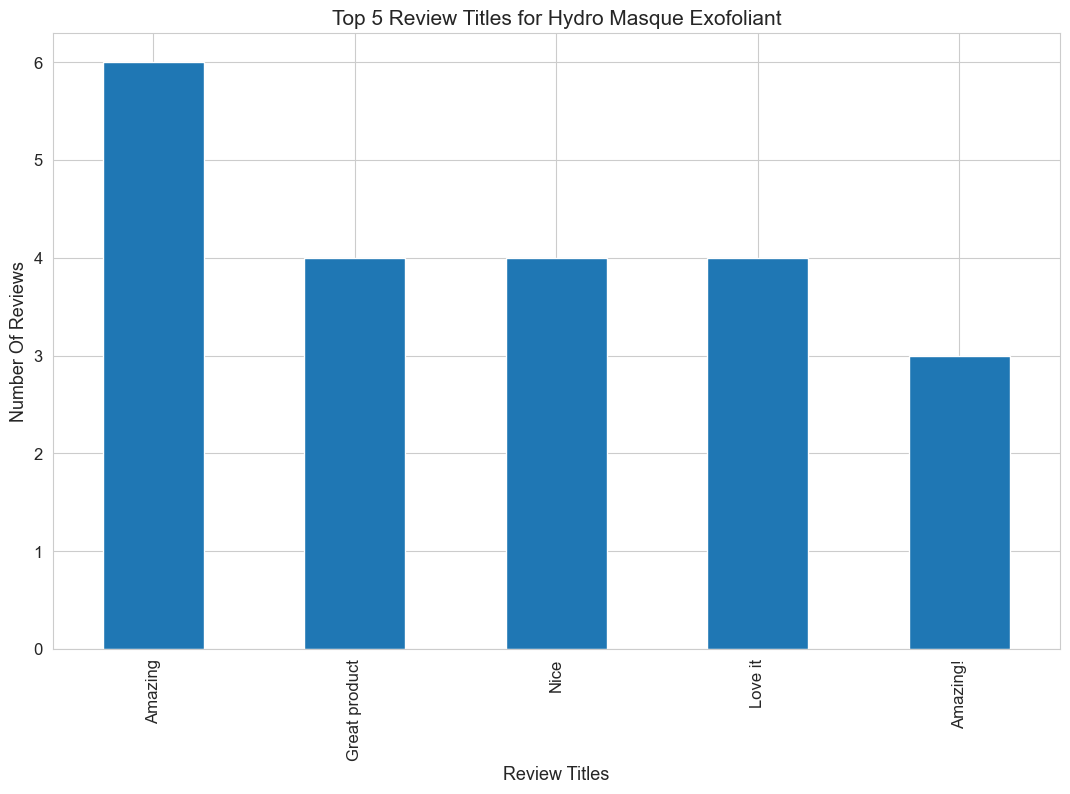

In [51]:
# Bar plot for the top 5 review titles for Hydro Masque Exofoliant
top_5_hydro_masque.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Top 5 Review Titles for Hydro Masque Exofoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

In [52]:
# Bottom 5 review titles for the Hydro masqur Exofoliant product
bottom_5_hydro_masque = (
    review_focus.query("product=='Hydro Masque Exfoliant'")["review_title"]
    .value_counts()[-5:]
    .sort_values(ascending=False)
)

bottom_5_hydro_masque

review_title
Easy 2 in 1         1
My new favorite!    1
LOVE IT             1
Great!              1
Extra hydrating!    1
Name: count, dtype: int64

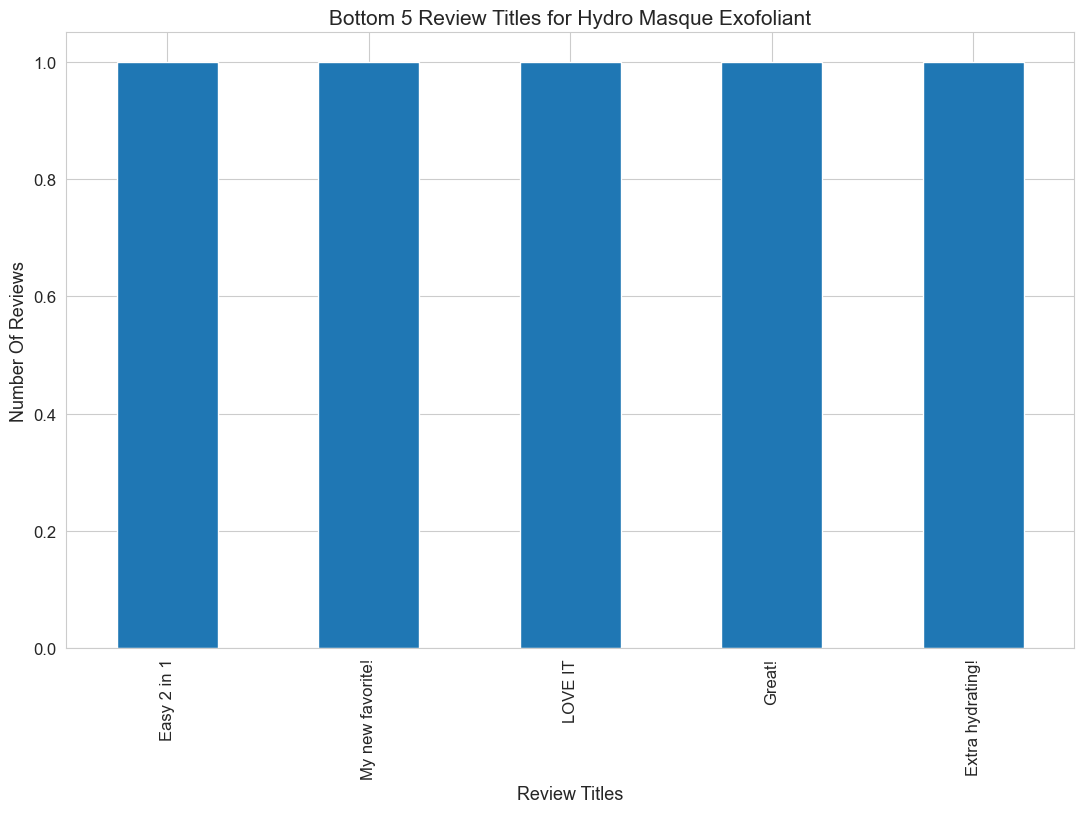

In [53]:
# Bar plot for the bottom 5 review titles for Hydro Masque Exofoliant
bottom_5_hydro_masque.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Bottom 5 Review Titles for Hydro Masque Exofoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

> From the above cells of the top 5 and bottom 5 titles and plots for the Hydro Masque Exofoliant products,and just like for the themofoliant, all the titles are positive. This can mean that the overall reviews of the reviews are positive for the products.

In [54]:
# Top 8 review titles for the Daily Superfoliant product
top_8_daily_superfoliant = (
    review_focus.query("product=='Daily Superfoliant'")["review_title"]
    .value_counts()[:8]
    .sort_values(ascending=False)
)

top_8_daily_superfoliant

review_title
Love it               22
Great product         19
Love it!              19
Amazing               14
Amazing!              12
Love this product!    10
Good product           9
Love this product      8
Name: count, dtype: int64

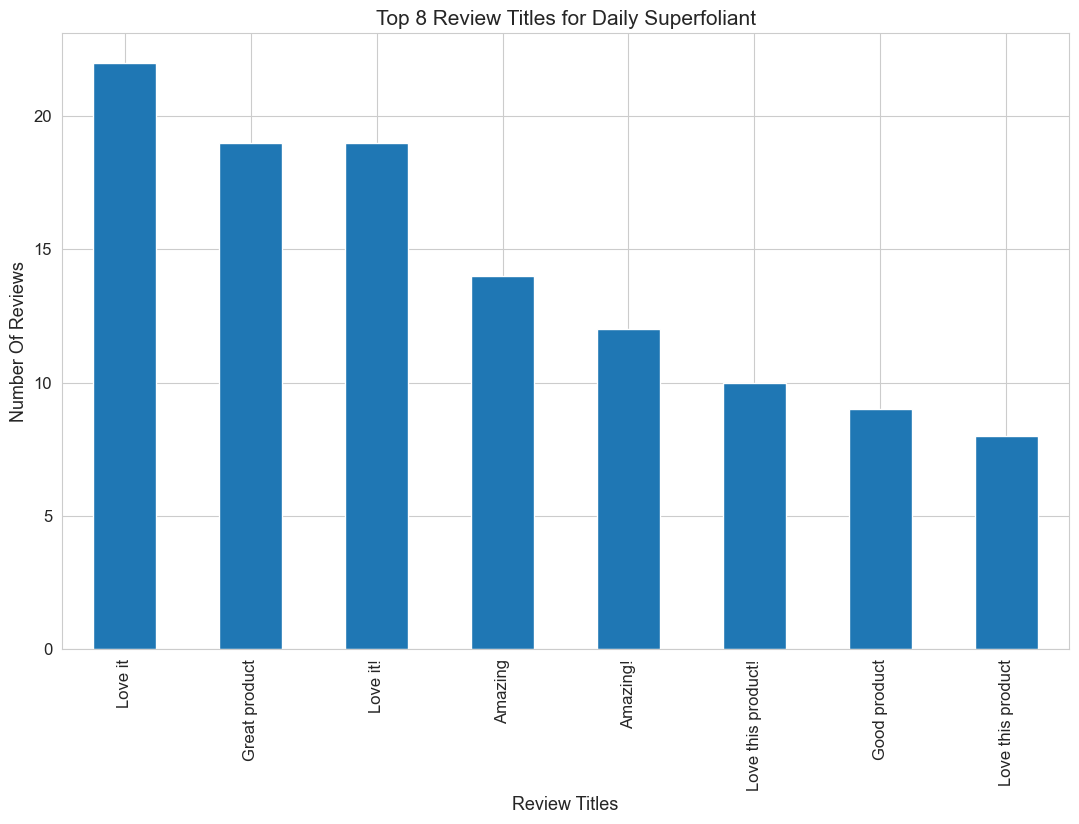

In [55]:
# Bar plot for the top 8 review titles for Hydro Masque Exofoliant
top_8_daily_superfoliant.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Top 8 Review Titles for Daily Superfoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

In [56]:
# Bottom 5 review titles for the Daily Superfoliant product
bottom_5_daily_superfoliant = (
    review_focus.query("product=='Daily Superfoliant'")["review_title"]
    .value_counts()[-5:]
    .sort_values(ascending=False)
)

bottom_5_daily_superfoliant

review_title
reduced redness, lessens wrinkles, feels    1
Favorite !                                  1
Awesome 10-stars                            1
I am a licensed Esthetician                 1
Rejuvenated skin at last!                   1
Name: count, dtype: int64

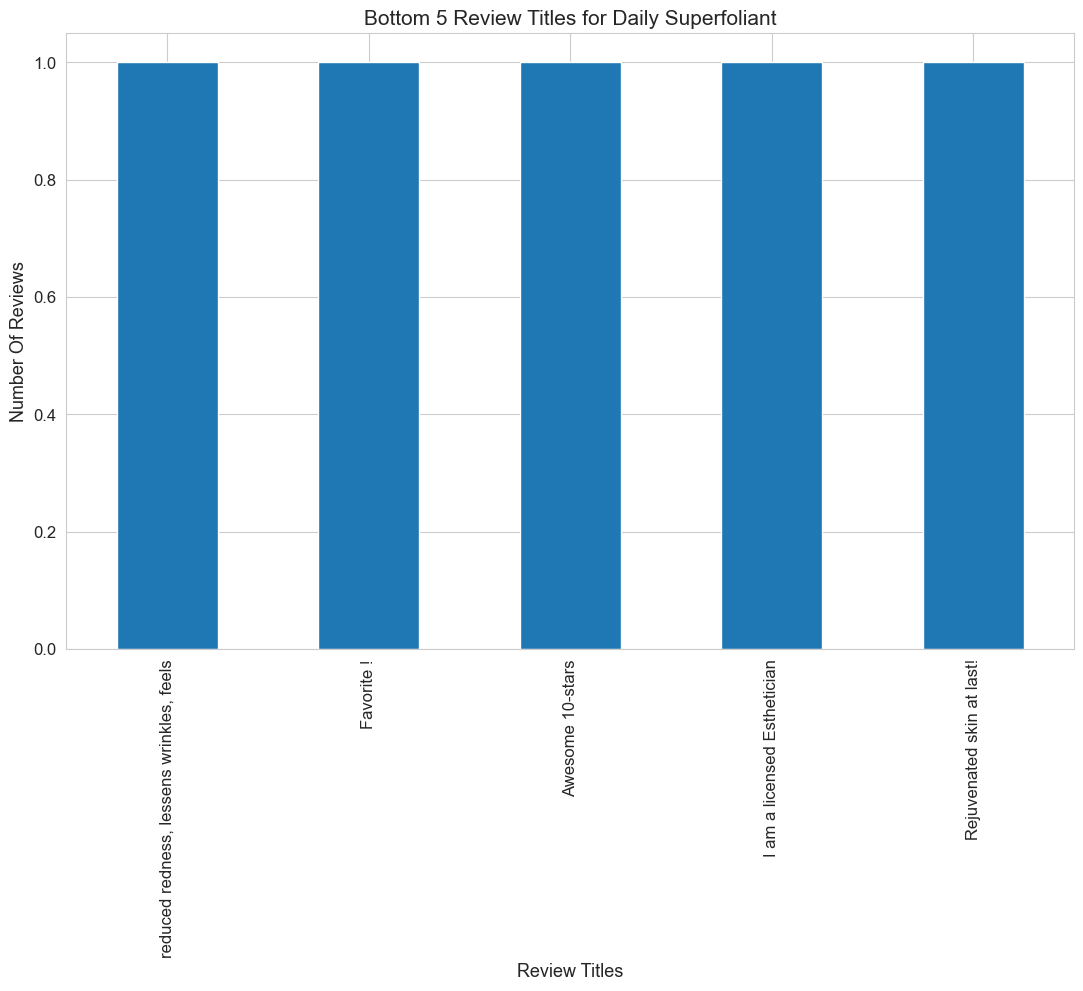

In [57]:
# Bar plot for the bottom 5 review titles for Hydro Masque Exofoliant
bottom_5_daily_superfoliant.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Bottom 5 Review Titles for Daily Superfoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

> From the above cells of the top 5 and bottom 5 titles and plots for the Daily Superfoliant, all the titles are positive. This can mean that the overall reviews of the reviews are positive for the products.

In [58]:
# Top 5 review titles for the Daily Microfoliant product
top_5_daily_microfoliant = (
    review_focus.query("product=='Daily Microfoliant'")["review_title"]
    .value_counts()[:5]
    .sort_values(ascending=False)
)

top_5_daily_microfoliant

review_title
Love it          23
Love it!         22
Amazing          16
Great product    12
Love             10
Name: count, dtype: int64

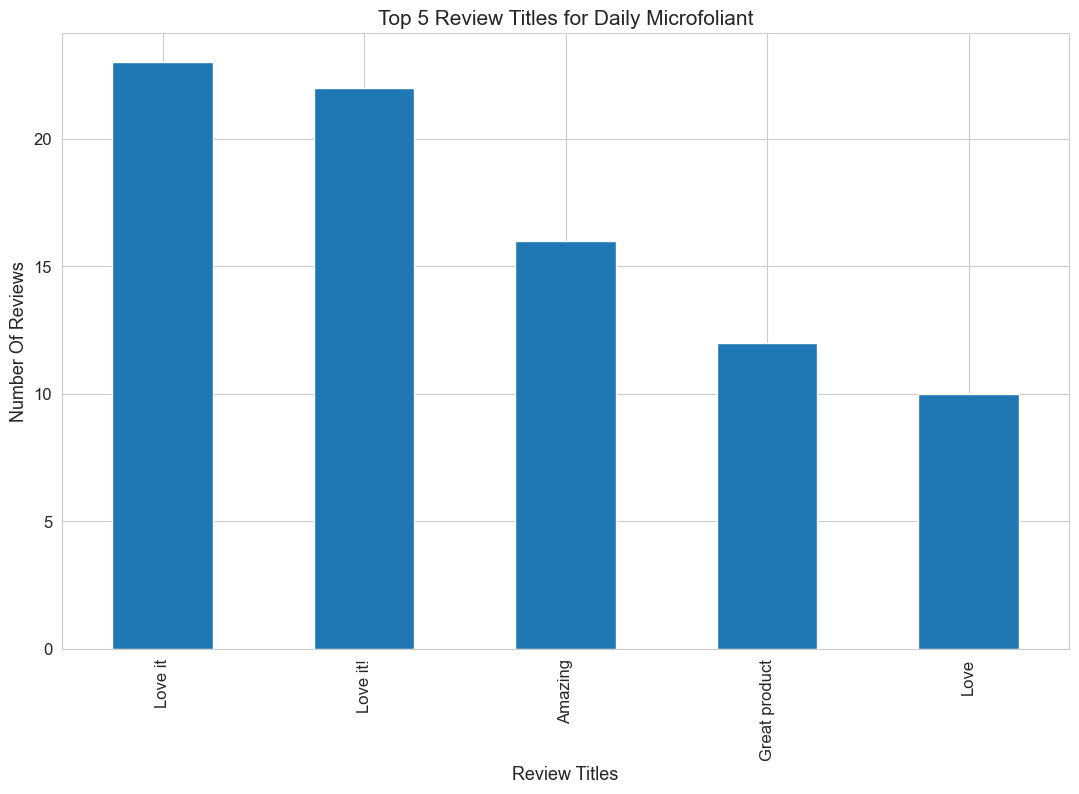

In [59]:
# Bar plot for the top 8 review titles for Hydro Masque Exofoliant
top_5_daily_microfoliant.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Top 5 Review Titles for Daily Microfoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

In [60]:
# Bottom 5 review titles for the Daily Superfoliant product
bottom_5_daily_microfoliant = (
    review_focus.query("product=='Daily Microfoliant'")["review_title"]
    .value_counts()[-5:]
    .sort_values(ascending=False)
)

bottom_5_daily_microfoliant

review_title
so good!                     1
Gently exfoliation           1
Gentle but very effective    1
YES & YES                    1
This is the best!!!          1
Name: count, dtype: int64

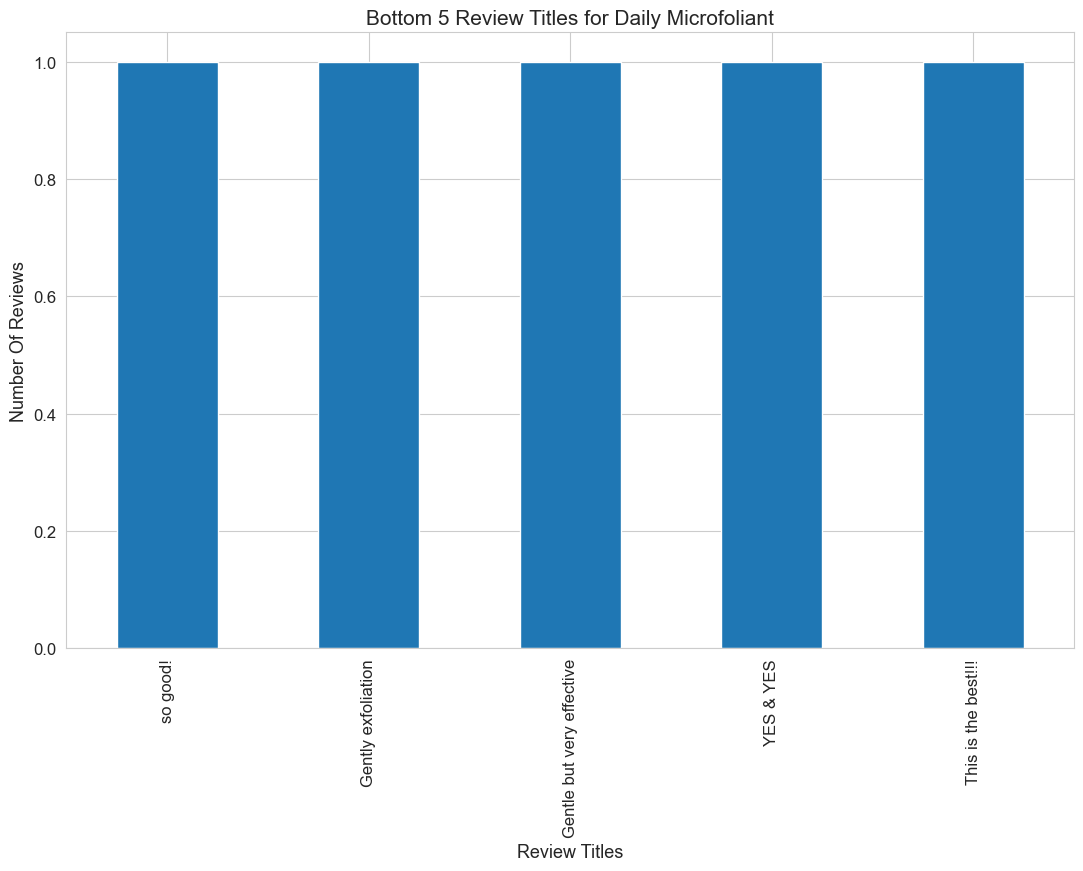

In [61]:
# Bar plot for the bottom 5 review titles for Hydro Masque Exofoliant
bottom_5_daily_microfoliant.plot(kind="bar", figsize=(13, 8), fontsize=12)
# setup the title and the labels of the plot.
plt.title("Bottom 5 Review Titles for Daily Microfoliant", fontsize=15)
plt.xlabel("Review Titles", fontsize=13)
plt.ylabel("Number Of Reviews", fontsize=13)
sns.set_style("whitegrid")

> From the above cells of the top 5 and bottom 5 titles and plots for the Daily Superfoliant, all the titles are positive. This can mean that the overall reviews of the reviews are positive for the products.

**From the above, it can be said that most reviews are positive.**

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [62]:
# Import wordcloud and textwrap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textwrap import wrap

In [63]:
review_focus["product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [65]:
# Create dataframes for the individual products

# Multi-Vitamin Thermafoliant
thermafoliant = review_focus.query("product=='Multi-Vitamin Thermafoliant'")

# Hydro Masque Exfoliant
exofoliant = review_focus.query("product=='Hydro Masque Exfoliant'")

# Daily Superfoliant
superfoliant = review_focus.query("product=='Daily Superfoliant'")

# Daily Microfoliant
microfoliant = review_focus.query("product=='Daily Microfoliant'")


# check
thermafoliant.head(3)

,review_title,review_text,product
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,Multi-Vitamin Thermafoliant


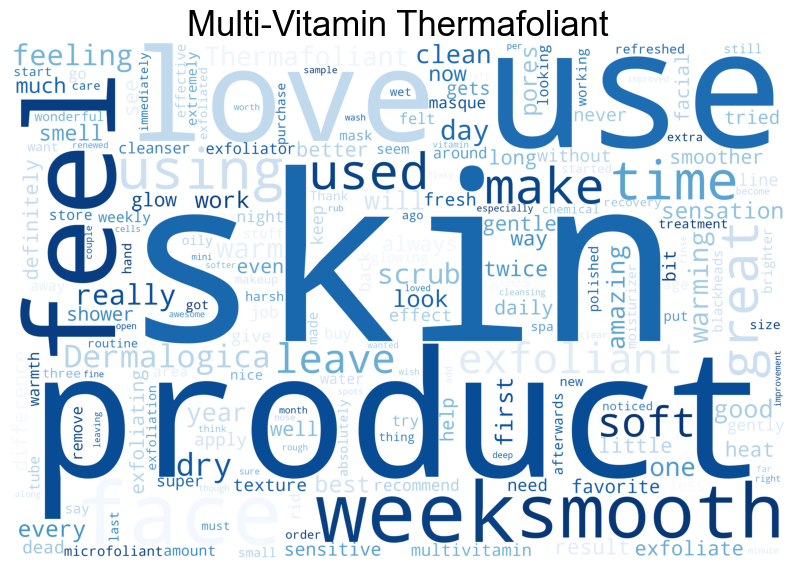

In [66]:
# Plot wordcloud for thermafoliant
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(
    random_state=1,
    width=3000,
    height=2000,
    background_color="white",
    colormap="Blues",
    collocations=False,
    stopwords=STOPWORDS,
).generate(str(thermafoliant["review_text"]))


plt.imshow(wordcloud)
plt.axis("off")
plt.title("Multi-Vitamin Thermafoliant", color="black", fontsize=25)
plt.show()

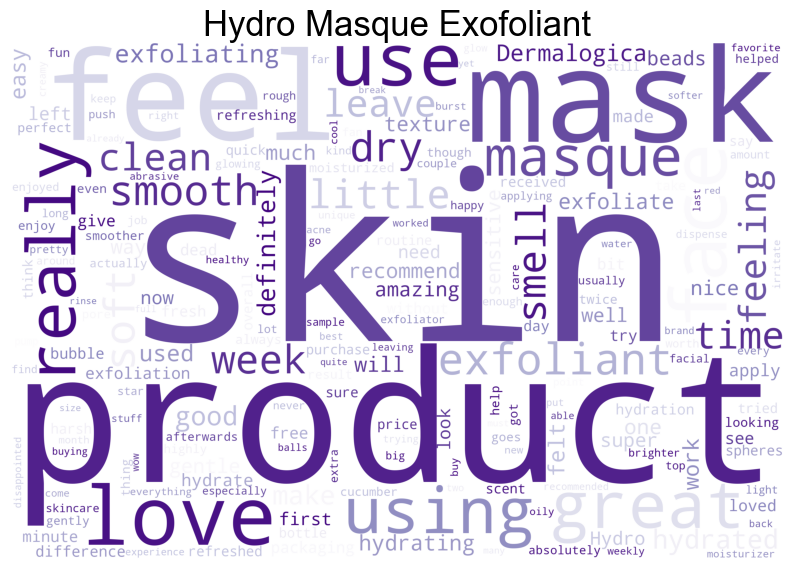

In [67]:
# Plot wordcloud for exofoliant
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(
    random_state=1,
    width=3000,
    height=2000,
    background_color="white",
    colormap="Purples",
    collocations=False,
    stopwords=STOPWORDS,
).generate(str(exofoliant["review_text"]))


plt.imshow(wordcloud)
plt.axis("off")
plt.title("Hydro Masque Exofoliant", color="black", fontsize=25)
plt.show()

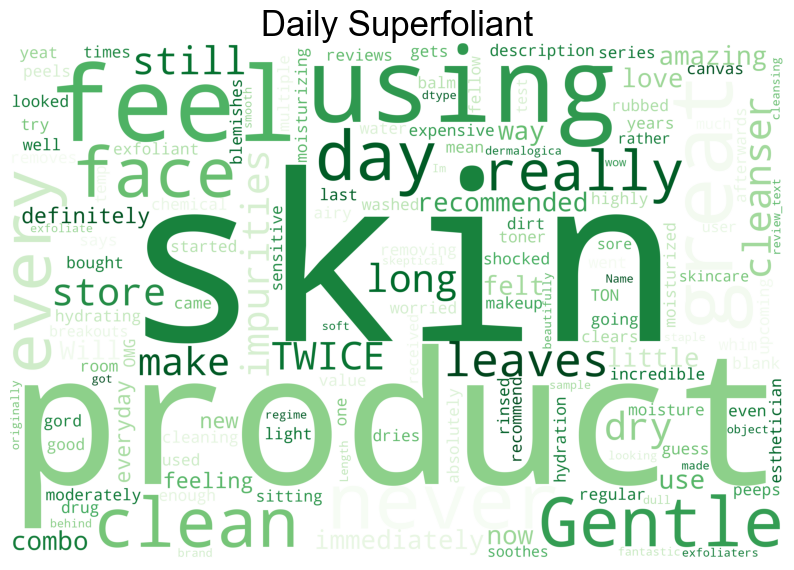

In [68]:
# Plot wordcloud for Superfoliant
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(
    random_state=1,
    width=3000,
    height=2000,
    background_color="white",
    colormap="Greens",
    collocations=False,
    stopwords=STOPWORDS,
).generate(str(superfoliant["review_text"]))


plt.imshow(wordcloud)
plt.axis("off")
plt.title("Daily Superfoliant", color="black", fontsize=25)
plt.show()

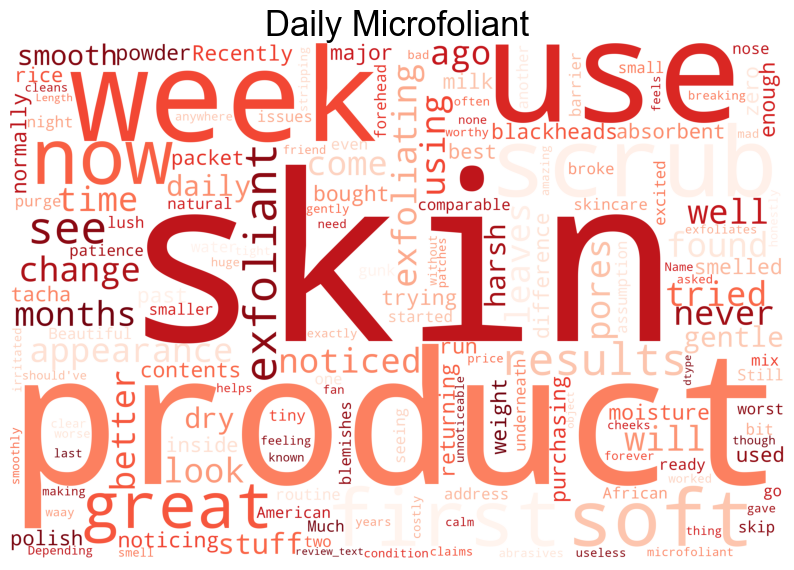

In [69]:
# Plot wordcloud for Microfoliant
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(
    random_state=1,
    width=3000,
    height=2000,
    background_color="white",
    colormap="Reds",
    collocations=False,
    stopwords=STOPWORDS,
).generate(str(microfoliant["review_text"]))


plt.imshow(wordcloud)
plt.axis("off")
plt.title("Daily Microfoliant", color="black", fontsize=25)
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [96]:
# Import Libraries
import spacy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Load spacy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
# Create review scores
sentiments = SentimentIntensityAnalyzer()
review_focus["positive"] = [
    sentiments.polarity_scores(i)["pos"] for i in review_focus["review_text"]
]
review_focus["negative"] = [
    sentiments.polarity_scores(i)["neg"] for i in review_focus["review_text"]
]
review_focus["neutral"] = [
    sentiments.polarity_scores(i)["neu"] for i in review_focus["review_text"]
]
review_focus["compound"] = [
    sentiments.polarity_scores(i)["compound"] for i in review_focus["review_text"]
]
review_focus.head()

,review_title,review_text,product,positive,negative,neutral,compound,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant,0.321,0.000,0.679,0.7964,2
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,Multi-Vitamin Thermafoliant,0.175,0.102,0.723,0.2960,2
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,Multi-Vitamin Thermafoliant,0.417,0.000,0.583,0.8347,2
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,Multi-Vitamin Thermafoliant,0.220,0.031,0.749,0.8636,2
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",Multi-Vitamin Thermafoliant,0.156,0.227,0.618,-0.3430,0


In [74]:
# Create sentiment from compound score
score = review_focus["compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append("Positive")
    elif i <= -0.05:
        sentiment.append("Negative")
    else:
        sentiment.append("Neutral")
review_focus["sentiment"] = sentiment

# Check
review_focus.head()

,review_title,review_text,product,positive,negative,neutral,compound,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant,0.321,0.000,0.679,0.7964,Positive
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,Multi-Vitamin Thermafoliant,0.175,0.102,0.723,0.2960,Positive
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,Multi-Vitamin Thermafoliant,0.417,0.000,0.583,0.8347,Positive
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,Multi-Vitamin Thermafoliant,0.220,0.031,0.749,0.8636,Positive
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",Multi-Vitamin Thermafoliant,0.156,0.227,0.618,-0.3430,Negative


In [76]:
# Map sentiment to integers
mapper = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2,
}

review_focus["sentiment"] = review_focus["sentiment"].map(mapper)

# Check
review_focus["sentiment"].unique()

array([2, 0, 1], dtype=int64)

In [80]:
review_focus.head(1)

,review_title,review_text,product,positive,negative,neutral,compound,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,Multi-Vitamin Thermafoliant,0.321,0.0,0.679,0.7964,2


In [83]:
# Instantiating the TfidfVectorizer, then fit_transform the review text column

tfidf_vec = TfidfVectorizer(stop_words="english")
review_data = tfidf_vec.fit_transform(review_focus["review_text"])
classifier = LinearSVC()
review_data

<3656x4931 sparse matrix of type '<class 'numpy.float64'>'
	with 69612 stored elements in Compressed Sparse Row format>

##### Model Training

In [85]:
X = review_focus["review_text"]
y = review_focus["sentiment"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [92]:
clf = Pipeline([("tfidf", tfidf_vec), ("clf", classifier)])

In [91]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [94]:
y_pred = clf.predict(X_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.14      0.21        43
           1       0.70      0.25      0.37        56
           2       0.92      0.99      0.95       815

    accuracy                           0.90       914
   macro avg       0.67      0.46      0.51       914
weighted avg       0.88      0.90      0.88       914



In [102]:
con_max = confusion_matrix(y_test, y_pred)
con_max

array([[  6,   2,  35],
       [  3,  14,  39],
       [  6,   4, 805]], dtype=int64)

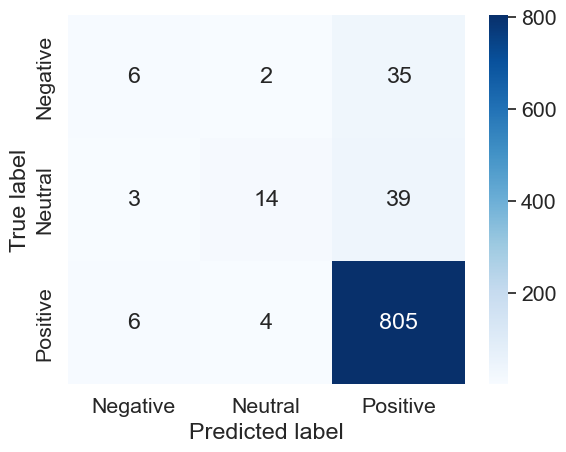

In [103]:
# visualizing confusion matrix
con_matrix = con_max.tolist()
labels = ["Negative", "Neutral", "Positive"]

# Create heatmap
sns.set(font_scale=1.4)
sns.heatmap(
    con_matrix,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

##### Predicting some review_texts

In [105]:
clf.predict(["Wow, this is amzing for my skin!!!, I will recommend it to my friends"])

array([2], dtype=int64)

From the above example, our model is good to go. Although there is always room for improvement.